In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels as sm


pd.set_option('display.max_columns', None)

C:\Users\vetle\AppData\Local\Temp\ipykernel_15004\4151701284.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print(f'number of rows: {df.shape[0]}')
      
print(f'{df.info()}')

number of rows: 8693
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
#Investigating nan values

#Names
print(df[df.Name.isna()].shape[0])
df[df.Name.isna()].head()

200


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False


In [7]:
df[df.Name.isna()].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,197.000000,199.000000,195.000000,196.000000,194.000000,196.000000
mean,28.050761,248.809045,462.312821,252.377551,291.479381,425.056122
std,15.548721,696.613956,1500.709392,1700.386746,829.241236,1995.127660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,113.000000,32.000000,41.000000,58.000000,22.000000
max,70.000000,6498.000000,12045.000000,23492.000000,6841.000000,24133.000000


In [8]:
# Home planet
print(df[df.HomePlanet.isna()].shape[0])
df[df.HomePlanet.isna()].head()

201


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True


In [9]:
print(df[df.CryoSleep.isna()].shape[0])
df[df.CryoSleep.isna()].head()

217


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True


In [10]:
print(df[df.Cabin.isna()].shape[0])
df[df.Cabin.isna()].head()

199


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True


In [11]:
print(df[df.VRDeck.isna()].shape[0])
df[df.VRDeck.isna()].head()

188


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
115,0120_01,Mars,True,F/25/P,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,NaN,Bees Sacre,True
251,0278_01,Earth,False,NaN,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,888.0,NaN,Judya Beachez,False
288,0316_02,Europa,True,B/9/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,NaN,Beneba Sorbitter,True


### Observations
- `VIP` and `CryoSleep` are boolean but has nan values
- Almost every category has `nan` values, there appears to be little overlap
- People in `VIP` who are nan can be safely replaced by `False`
- People with `CryoSleep` at nan should be dropped

In [12]:
# y label
df.Transported.mean()

0.5036236051995858

In [13]:
# VIP
print(f'People who are VIP: {df.query("VIP == True").Transported.mean()}\nPeople who are not VIP: {df.query("VIP != True").Transported.mean()}\nPeople who are nan: {df[df.VIP.isna()].Transported.mean()}')

df.VIP.value_counts(dropna = False)

People who are VIP: 0.38190954773869346
People who are not VIP: 0.5064751589357194
People who are nan: 0.5123152709359606


VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64

In [14]:
# VIP
print(f'People who are in CryoSleep: {df.query("CryoSleep == True").Transported.mean()}\nPeople who are not in CryoSleep: {df.query("CryoSleep != True").Transported.mean()}\nPeople who are nan: {df[df.CryoSleep.isna()].Transported.mean()}')

df.CryoSleep.value_counts(dropna = False)

People who are in CryoSleep: 0.8175831412578202
People who are not in CryoSleep: 0.33504243281471
People who are nan: 0.48847926267281105


CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

In [15]:
def vip_nan(df):
    df_out = df.copy()
    df_out.VIP = df_out.VIP.fillna('False')
    return df_out
def cryo_nan(df):
    df_out = df.copy()
    df_out = df_out.dropna(subset=['CryoSleep'])
    return df_out

df_in_use = df.copy()
df_in_use = vip_nan(df_in_use)
df_in_use = cryo_nan(df_in_use)

In [16]:
# Other observations, numerical values

df_in_use.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8298.000000,8297.000000,8296.000000,8276.000000,8298.000000,8295.000000
mean,28.851530,224.850187,458.003857,174.429555,311.994577,305.100663
std,14.480515,665.057747,1615.843798,609.451108,1142.580354,1147.401256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,28.000000,61.000000,47.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Questions

- Is `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` and `VRDeck` money values?
    - These are all how much the passengers was billed for these services
- Is there any structure in the setup for `PassengerID`, `Cabin` and `Destination`?
    - `Cabin`: Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    - `PassengerID`: A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [17]:
# Making new features 
def passenger_group(df):
    df_out = df.copy()
    df_out['PassengerGroup'] = df_out.PassengerId.str.split('_').str[0]
    df_out['PassengerInternalGroupNumber'] = df_out.PassengerId.str.split('_').str[1]
    return df_out

def cabin_split(df):
    df_out = df.copy()
    df_out['Deck'] = df_out.Cabin.str.split('/').str[0]
    df_out['Num'] = df_out.Cabin.str.split('/').str[1]
    df_out['Side'] = df_out.Cabin.str.split('/').str[2]
    return df_out

In [18]:
df_in_use = passenger_group(df_in_use)
df_in_use = cabin_split(df_in_use)
df_in_use.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerInternalGroupNumber,Deck,Num,Side
3858,4134_01,NaN,True,NaN,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Cird Datty,True,4134,01,NaN,NaN,NaN
2923,3168_01,Earth,False,F/658/P,TRAPPIST-1e,24.0,False,0.0,7.0,548.0,4.0,0.0,Jaimez Peckerson,True,3168,01,F,658,P
7266,7770_02,Earth,False,F/1485/S,55 Cancri e,20.0,False,748.0,0.0,0.0,0.0,487.0,Jerrye Oneiles,False,7770,02,F,1485,S
6549,6911_01,Mars,False,F/1323/S,TRAPPIST-1e,50.0,False,118.0,0.0,1041.0,0.0,0.0,Powhex Sutte,True,6911,01,F,1323,S
8251,8816_02,NaN,True,B/340/S,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Mesatik Diouselt,True,8816,02,B,340,S


### More questions

- Where are people going? Where do they come from?
    - Most people come from either Earth, and there is an equal split between people from Mars and Europa. People from europa has a larger successrate than the others
- How many groups are there? How big are the passenger groups?
    - There are over 6000 groups most only have one passenger, no group has more than 8 people
    - Does groups with more than one have a larger or smaller successrate?
- Is there a correlation between `PassengerGroup` and `Transported`?
    - Nothing very clear
- What about `Decks`, `Nums` and `Side` does that mean anything?
    - `Decks`: most people are from F and G, people from B and C are more likely to be transported than any other group
    - `Side`: Deck sides are evenly split, a slight majority is in S and they also have a 10% higher transport rate

In [19]:
def category_checkout(cat, df_in_use = df_in_use):
    return df_in_use.groupby(cat, dropna= False).agg({'PassengerId':'nunique', 'Transported':'mean'}).rename(columns = {'PassengerId': 'number_of_passengers', 'Transported': 'transport_rate'})

In [20]:
# Where are people going?
category_checkout('Destination')

,number_of_passengers,transport_rate
Destination,,
55 Cancri e,1756,0.611048
PSO J318.5-22,777,0.505792
TRAPPIST-1e,5765,0.471292
NaN,178,0.500000


In [21]:
#Where are people from?
# Where are people going?
# Where are people going?
category_checkout('HomePlanet')

,number_of_passengers,transport_rate
HomePlanet,,
Earth,4488,0.424242
Europa,2073,0.658948
Mars,1716,0.524476
NaN,199,0.512563


In [22]:
#How many groups are there and how big are the groups?
print(f'Number of passenger groups {df_in_use.PassengerGroup.nunique()}\n')
df_in_use.groupby('PassengerGroup').agg({'PassengerInternalGroupNumber':'nunique', 'Transported':'mean'}).describe().rename(columns = {'Transported': 'transport_rate'})

Number of passenger groups 6109



,PassengerInternalGroupNumber,transport_rate
count,6109.000000,6109.000000
mean,1.387461,0.478283
std,0.923736,0.469490
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.500000
75%,1.000000,1.000000
max,8.000000,1.000000


In [23]:
category_checkout('Deck', df_in_use)

,number_of_passengers,transport_rate
Deck,,
A,250,0.492000
B,760,0.736842
C,724,0.678177
D,468,0.435897
E,856,0.357477
F,2726,0.439839
G,2496,0.517628
T,4,0.250000
NaN,192,0.500000


In [24]:
category_checkout('Side', df_in_use)

,number_of_passengers,transport_rate
Side,,
P,4093,0.453213
S,4191,0.553806
NaN,192,0.500000


In [25]:
# Where are people going?
category_checkout(['Num'])

,number_of_passengers,transport_rate
Num,,
0,18,0.333333
1,15,0.666667
10,12,0.500000
100,12,0.583333
1000,6,0.500000
...,...,...
996,1,1.000000
997,2,0.000000
998,4,0.250000


In [26]:
category_checkout('PassengerInternalGroupNumber')

,number_of_passengers,transport_rate
PassengerInternalGroupNumber,,
01,6068,0.475939
02,1370,0.561314
03,557,0.614004
04,225,0.595556
05,124,0.556452
06,74,0.554054
07,45,0.511111
08,13,0.461538


### More questions
- It might be interesting to get an idea of total amount billed, is there a relationsship between that and transport rate
- Where do most people spend money, does where they spend money matter in terms of transport rate?


In [27]:
df_in_use.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerInternalGroupNumber,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


In [28]:
df_in_use.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8298.000000,8297.000000,8296.000000,8276.000000,8298.000000,8295.000000
mean,28.851530,224.850187,458.003857,174.429555,311.994577,305.100663
std,14.480515,665.057747,1615.843798,609.451108,1142.580354,1147.401256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,28.000000,61.000000,47.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [29]:
def total_billed(df):
    df_out = df.copy()
    billing = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for i in billing:
        df_out[i] = df[i].fillna(0)
    df_out['TotalBill'] = df_out.RoomService + df_out.FoodCourt + df_out.ShoppingMall + df_out.Spa + df_out.VRDeck
    df_out['SpentMoney'] = np.where(df_out['TotalBill'].values == 0, True, False)
    return df_out

In [30]:
df_in_use = total_billed(df_in_use)

df_in_use.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill
count,8298.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000
mean,28.851530,220.101699,448.277489,170.313709,305.442544,298.585418,1442.720859
std,14.480515,658.790747,1599.955616,602.798802,1131.402772,1135.939344,2814.112526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,717.000000
75%,38.000000,41.000000,60.000000,23.000000,54.000000,40.250000,1434.250000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [31]:
df_in_use.groupby('Transported')['TotalBill'].describe()


,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
False,4204.0,2007.086108,3152.771425,0.0,683.75,907.0,2093.0,35987.0
True,4272.0,887.338951,2304.448973,0.0,0.00,0.0,809.0,31076.0


### Observation
- Looks like those who spent little money were more likely to be transported
- What about `Age`? Not a good indicator

In [32]:
df_in_use.groupby('Transported')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
False,4116.0,29.943149,13.671290,0.0,21.0,27.0,38.0,79.0
True,4182.0,27.777140,15.160122,0.0,18.0,26.0,37.0,78.0


In [33]:
# looking at if spending category matters

#easiest is has spent money

df_in_use.query("TotalBill == 0").Transported.mean()

0.7881856540084389

In [34]:
df_in_use.query("TotalBill != 0").Transported.mean()

0.29871977240398295

In [35]:
df_in_use.groupby('HomePlanet', dropna = False)['TotalBill'].describe()

,count,mean,std,min,25%,50%,75%,max
HomePlanet,,,,,,,,
Earth,4488.0,670.981283,765.840746,0.0,0.0,704.0,887.00,6335.0
Europa,2073.0,3469.360830,4870.266743,0.0,0.0,1947.0,5388.00,35987.0
Mars,1716.0,1055.585664,1351.191800,0.0,0.0,947.0,1706.25,10801.0
NaN,199.0,1074.211055,1925.809667,0.0,0.0,700.0,1154.50,13558.0


In [36]:

df_in_use.query("TotalBill == 0 and HomePlanet == 'Europa'").Transported.mean()

0.970736629667003

In [37]:
df_in_use.query("TotalBill != 0 and HomePlanet == 'Europa'").Transported.mean()

0.3733826247689464

### Observations

- Spent money seems to be a good indicator of transport rate
- `Homeplanet` also seems promising

In [38]:
def home_planet(df):
    df_out = df.copy()
    df_out.HomePlanet = df_out.HomePlanet.fillna('Mars')
    return df_out

In [39]:
df_in_use = home_planet(df_in_use)
df_in_use.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerInternalGroupNumber,Deck,Num,Side,TotalBill,SpentMoney
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S,1091.0,False


### More observations

- I Want to make a model now

#### Are there things I still would like to investigate?
- Does spending in certain categories matter in more than others?
- is there a correlation between age and money spent?
- What about between age, money and transport?

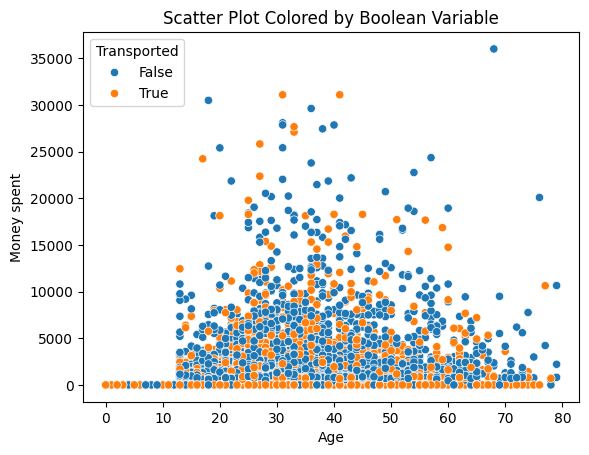

In [40]:
#fig, ax = plt.subplots(1,1)
#ax[0].scatter()
#plt.scatter(x = df_in_use.TotalBill, y = df_in_use.Age, col)


sns.scatterplot(data=df_in_use, x='Age', y='TotalBill', hue='Transported')

# Optional: Add a title and labels for clarity
plt.title('Scatter Plot Colored by Boolean Variable')
plt.xlabel('Age')
plt.ylabel('Money spent')
plt.legend(title='Transported')

plt.show()

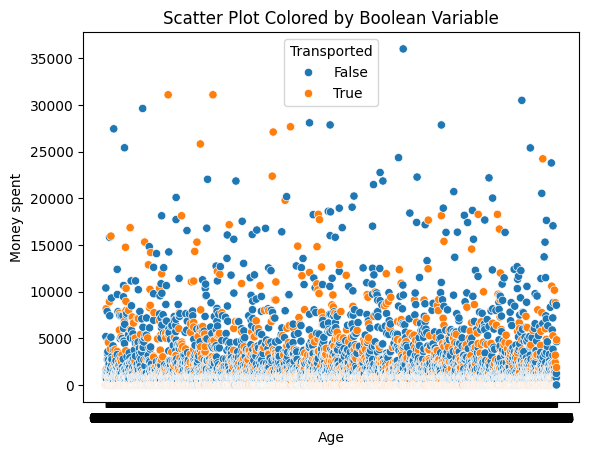

In [41]:
sns.scatterplot(data=df_in_use, x='PassengerGroup', y='TotalBill', hue='Transported')

# Optional: Add a title and labels for clarity
plt.title('Scatter Plot Colored by Boolean Variable')
plt.xlabel('Age')
plt.ylabel('Money spent')
plt.legend(title='Transported')

plt.show()

In [42]:
df_in_use.corr(numeric_only= True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalBill,SpentMoney
Age,1.000000,0.068319,0.131058,0.031741,0.123361,0.101483,-0.074793,0.188147,-0.230682
RoomService,0.068319,1.000000,-0.014049,0.053274,0.006673,-0.022171,-0.241718,0.231260,-0.283985
FoodCourt,0.131058,-0.014049,1.000000,-0.012954,0.221994,0.227442,0.044639,0.743544,-0.238154
ShoppingMall,0.031741,0.053274,-0.012954,1.000000,0.015634,-0.006969,0.010920,0.222785,-0.240157
Spa,0.123361,0.006673,0.221994,0.015634,1.000000,0.149735,-0.217830,0.593613,-0.229473
VRDeck,0.101483,-0.022171,0.227442,-0.006969,0.149735,1.000000,-0.204409,0.586487,-0.223425
Transported,-0.074793,-0.241718,0.044639,0.010920,-0.217830,-0.204409,1.000000,-0.198957,0.483083
TotalBill,0.188147,0.231260,0.743544,0.222785,0.593613,0.586487,-0.198957,1.000000,-0.435772
SpentMoney,-0.230682,-0.283985,-0.238154,-0.240157,-0.229473,-0.223425,0.483083,-0.435772,1.000000


In [43]:
df_in_use.groupby('Transported', dropna = False)['RoomService'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
False,4204.0,380.616556,864.826794,0.0,0.0,1.0,454.0,14327.0
True,4272.0,62.141854,273.617915,0.0,0.0,0.0,0.0,3992.0


In [44]:
df_in_use.groupby('Transported', dropna = False)['FoodCourt'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
False,4204.0,376.286394,1197.458811,0.0,0.0,0.0,170.0,16856.0
True,4272.0,519.122659,1912.683834,0.0,0.0,0.0,0.0,29813.0


## Model

Random forest using `MoneySpent` and `HomePlanet`

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Sample DataFrame creation (assuming df is your DataFrame)
# df['MoneySpent'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Define a custom function for summing the expenses
def create_money_spent_feature(df):
    df['MoneySpent'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    return df


# Wrap the function in FunctionTransformer
money_spent_transformer = FunctionTransformer(create_money_spent_feature)

# Now, prepare the rest of the pipeline


# Adjust the ColumnTransformer to only include 'HomePlanet' for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['HomePlanet', 'Deck','Side','VIP']),
        ('num', scaler, ['MoneySpent'])
    ],
    remainder='drop'  # This will drop all other columns not explicitly transformed
)

# Define the full pipeline
rf_pipeline = Pipeline(steps=[
    ('cabin_split', FunctionTransformer(cabin_split)),
    ('money_spent_creator', FunctionTransformer(create_money_spent_feature)),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Assuming 'Transported' is the label
y = df['Transported']
X = df.drop('Transported', axis=1)  # The original DataFrame without the label

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
rf_pipeline.fit(X_train, y_train)

# Now you can use the pipeline to make predictions
# predictions = full_pipeline.predict(X_test)


Pipeline(steps=[('cabin_split',
                 FunctionTransformer(func=<function cabin_split at 0x000001BC7FBEFAC0>)),
                ('money_spent_creator',
                 FunctionTransformer(func=<function create_money_spent_feature at 0x000001BC1FD46560>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['HomePlanet', 'Deck', 'Side',
                                                   'VIP']),
                                                 ('num', StandardScaler(),
                                                  ['MoneySpent'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [46]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
2333,2513_01,Earth,False,NaN,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison
2589,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley
8302,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling
8177,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,NaN,2.0,289.0,976.0,0.0,Tros Pota
500,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet


In [72]:
# Cross testing

from sklearn.model_selection import cross_val_score

# Assuming your pipeline is named `pipeline` and is already fitted if needed
# X and y are your features and target variable

# Perform cross-validation
cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [0.71707878 0.71420357 0.70902818 0.73302647 0.70771001]
Mean CV accuracy: 0.7162094004000817


In [73]:
from sklearn.metrics import confusion_matrix#, plot_confusion_matrix
import matplotlib.pyplot as plt

# Assuming X_test and y_test are your test features and labels
y_pred = rf_pipeline.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix



Confusion Matrix:
 [[572 289]
 [193 685]]


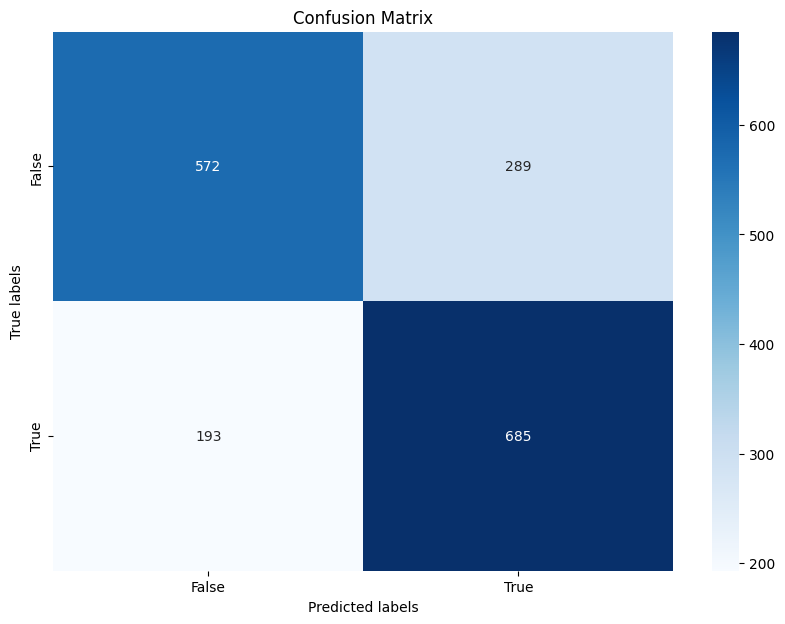

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are available
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision},\nRecall: {recall},\nF1 Score: {f1}")

# For ROC AUC Score, you'll need probability scores instead of binary predictions
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]  # Assuming your model has a predict_proba method
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC AUC Score: {roc_auc}\n")

# Log Loss
logloss = log_loss(y_test, y_prob)

print(f"Log Loss: {logloss}")


Precision: 0.7032854209445585,
Recall: 0.7801822323462415,
F1 Score: 0.7397408207343412
ROC AUC Score: 0.7919447905836038

Log Loss: 1.41905949730504


## Testing linear regression

In [76]:
rf_pipeline = Pipeline(steps=[
    ('cabin_split', FunctionTransformer(cabin_split)),
    ('money_spent_creator', FunctionTransformer(create_money_spent_feature)),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

from sklearn.linear_model import LogisticRegression
logistic_pipeline = Pipeline(steps=[
    ('cabin_split', FunctionTransformer(cabin_split)),
    ('money_spent_creator', FunctionTransformer(create_money_spent_feature)),
    ('preprocessing', preprocessor),
    ('logistic_regression', LogisticRegression(solver='liblinear', random_state=42))
])

logistic_pipeline.fit(X_train, y_train)


Pipeline(steps=[('cabin_split',
                 FunctionTransformer(func=<function cabin_split at 0x000001BC7FBEFAC0>)),
                ('money_spent_creator',
                 FunctionTransformer(func=<function create_money_spent_feature at 0x000001BC1FD46560>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['HomePlanet', 'Deck', 'Side',
                                                   'VIP']),
                                                 ('num', StandardScaler(),
                                                  ['MoneySpent'])])),
                ('logistic_regression',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [77]:
# testing

y_pred = logistic_pipeline.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision},\nRecall: {recall},\nF1 Score: {f1}")

# For ROC AUC Score, you'll need probability scores instead of binary predictions
y_prob = logistic_pipeline.predict_proba(X_test)[:, 1]  # Assuming your model has a predict_proba method
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC AUC Score: {roc_auc}\n")

# Log Loss
logloss = log_loss(y_test, y_prob)

print(f"Log Loss: {logloss}")


Precision: 0.7170294494238156,
Recall: 0.6378132118451025,
F1 Score: 0.6751054852320675
ROC AUC Score: 0.7647911656467687

Log Loss: 0.5923788865104914


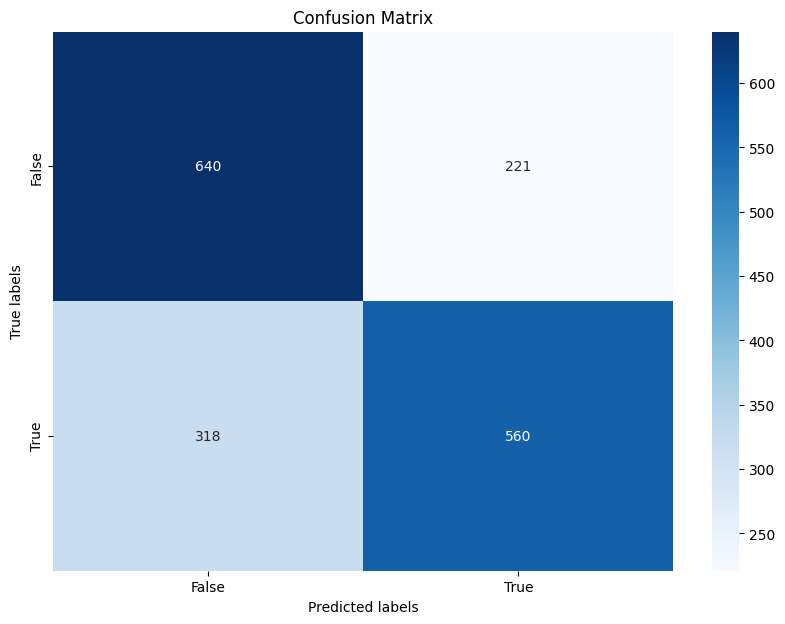

In [78]:
# Assuming y_test and y_pred are available
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Not a great model - but it captures something

In [54]:
df_in_use.info()
df_in_use.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 8476 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PassengerId                   8476 non-null   object 
 1   HomePlanet                    8476 non-null   object 
 2   CryoSleep                     8476 non-null   object 
 3   Cabin                         8284 non-null   object 
 4   Destination                   8298 non-null   object 
 5   Age                           8298 non-null   float64
 6   VIP                           8476 non-null   object 
 7   RoomService                   8476 non-null   float64
 8   FoodCourt                     8476 non-null   float64
 9   ShoppingMall                  8476 non-null   float64
 10  Spa                           8476 non-null   float64
 11  VRDeck                        8476 non-null   float64
 12  Name                          8286 non-null   object 
 13  Transpor

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerInternalGroupNumber,Deck,Num,Side,TotalBill,SpentMoney
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S,736.0,False


In [55]:
#
import statsmodels as sm

df_in_use.corr(numeric_only= True)['SpentMoney']

Age            -0.230682
RoomService    -0.283985
FoodCourt      -0.238154
ShoppingMall   -0.240157
Spa            -0.229473
VRDeck         -0.223425
Transported     0.483083
TotalBill      -0.435772
SpentMoney      1.000000
Name: SpentMoney, dtype: float64

In [56]:
import statsmodels.api as sm

# Assuming X and y are your condition and outcome variables, respectively
# Add a constant to the condition variable to include the intercept in the model
X = sm.add_constant(X)
X


c:\Users\vetle\repo\space-titanic-kaggle\venv\lib\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\vetle\repo\space-titanic-kaggle\venv\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


,const,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,1.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,1.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,1.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,1.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,1.0,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,1.0,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,1.0,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [57]:
df_in_use['MoneySpent'] = df_in_use.SpentMoney.astype(int)
df_in_use['Age'] = df_in_use.Age.fillna(df_in_use.Age.median())
df_in_use['CryoSleep'] = df_in_use.CryoSleep.astype(int).fillna(df_in_use.CryoSleep.astype(int).mode())
model = sm.Logit(df_in_use['Transported'].values, df_in_use[[ 'MoneySpent']].values).fit()

# Print the model summary to see the coefficient estimates and other statistics
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.618995
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8476
Model:                          Logit   Df Residuals:                     8475
Method:                           MLE   Df Model:                            0
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.1069
Time:                        13:38:11   Log-Likelihood:                -5246.6
converged:                       True   LL-Null:                       -5874.8
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3140      0.041     32.012      0.000       1.234       1.394


In [58]:
X

,const,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1.0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,1.0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,1.0,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,1.0,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,1.0,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,1.0,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,1.0,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,1.0,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [59]:
import plotly.express as px

In [60]:
#df_in_use
X = sm.add_constant(pd.get_dummies(df_in_use[['HomePlanet', 'TotalBill','MoneySpent', 'Deck', 'Side','VIP']], columns=['HomePlanet', 'Deck', 'Side','VIP'], drop_first=True)).astype(int)

model = sm.Logit(df_in_use['Transported'].values, X).fit()

# Print the model summary to see the coefficient estimates and other statistics
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.536716
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8476
Model:                          Logit   Df Residuals:                     8461
Method:                           MLE   Df Model:                           14
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.2256
Time:                        13:38:11   Log-Likelihood:                -4549.2
converged:                       True   LL-Null:                       -5874.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3480      0.155     -8.723      0.000      -1.651      -1.045
TotalBil

c:\Users\vetle\repo\space-titanic-kaggle\venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


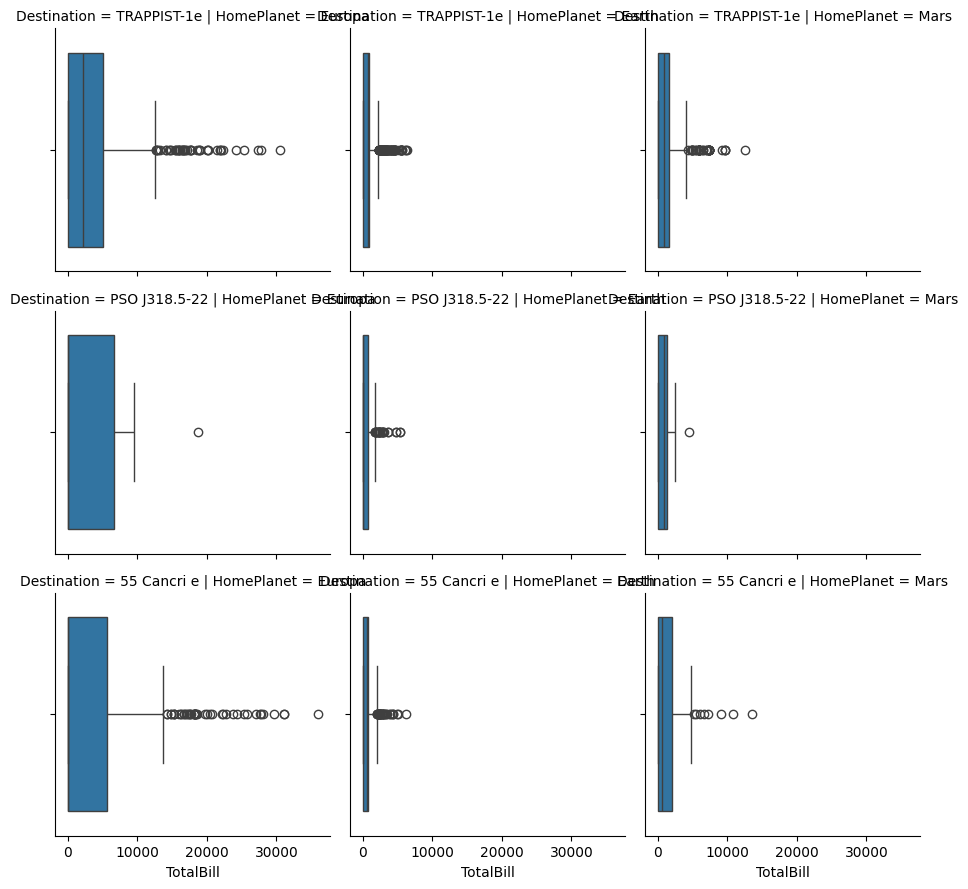

In [61]:
#Checking out total spending
g = sns.FacetGrid(df_in_use, col = 'HomePlanet', row = 'Destination')
g.map(sns.boxplot,'TotalBill')

c:\Users\vetle\repo\space-titanic-kaggle\venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


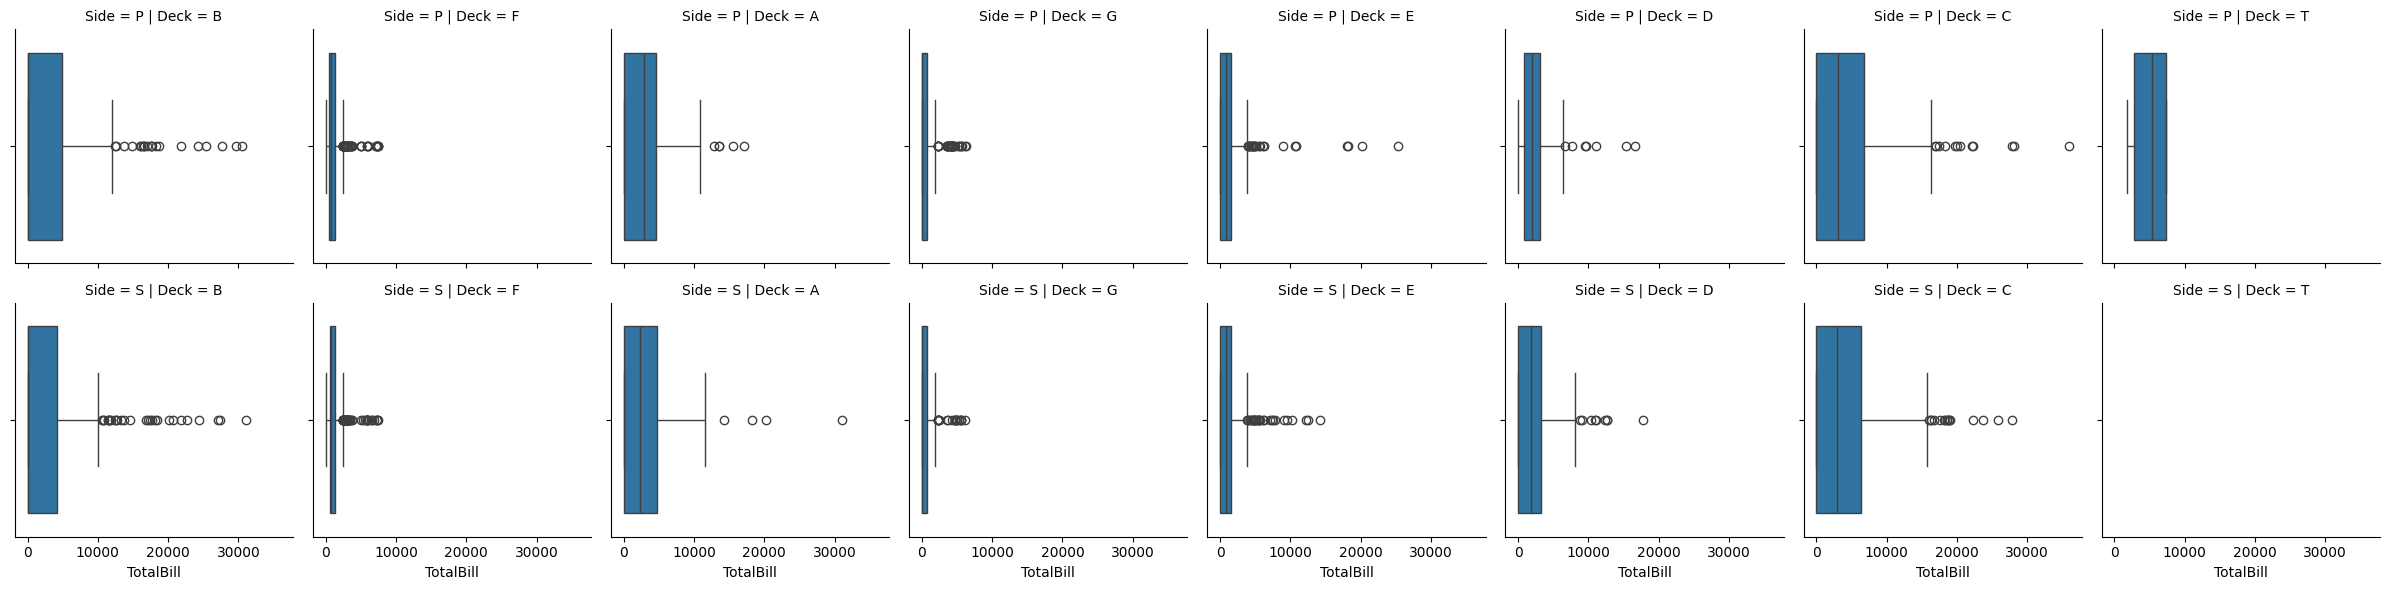

In [62]:
#Checking out total spending
g = sns.FacetGrid(df_in_use, col = 'Deck', row = 'Side')
g.map(sns.boxplot,'TotalBill')

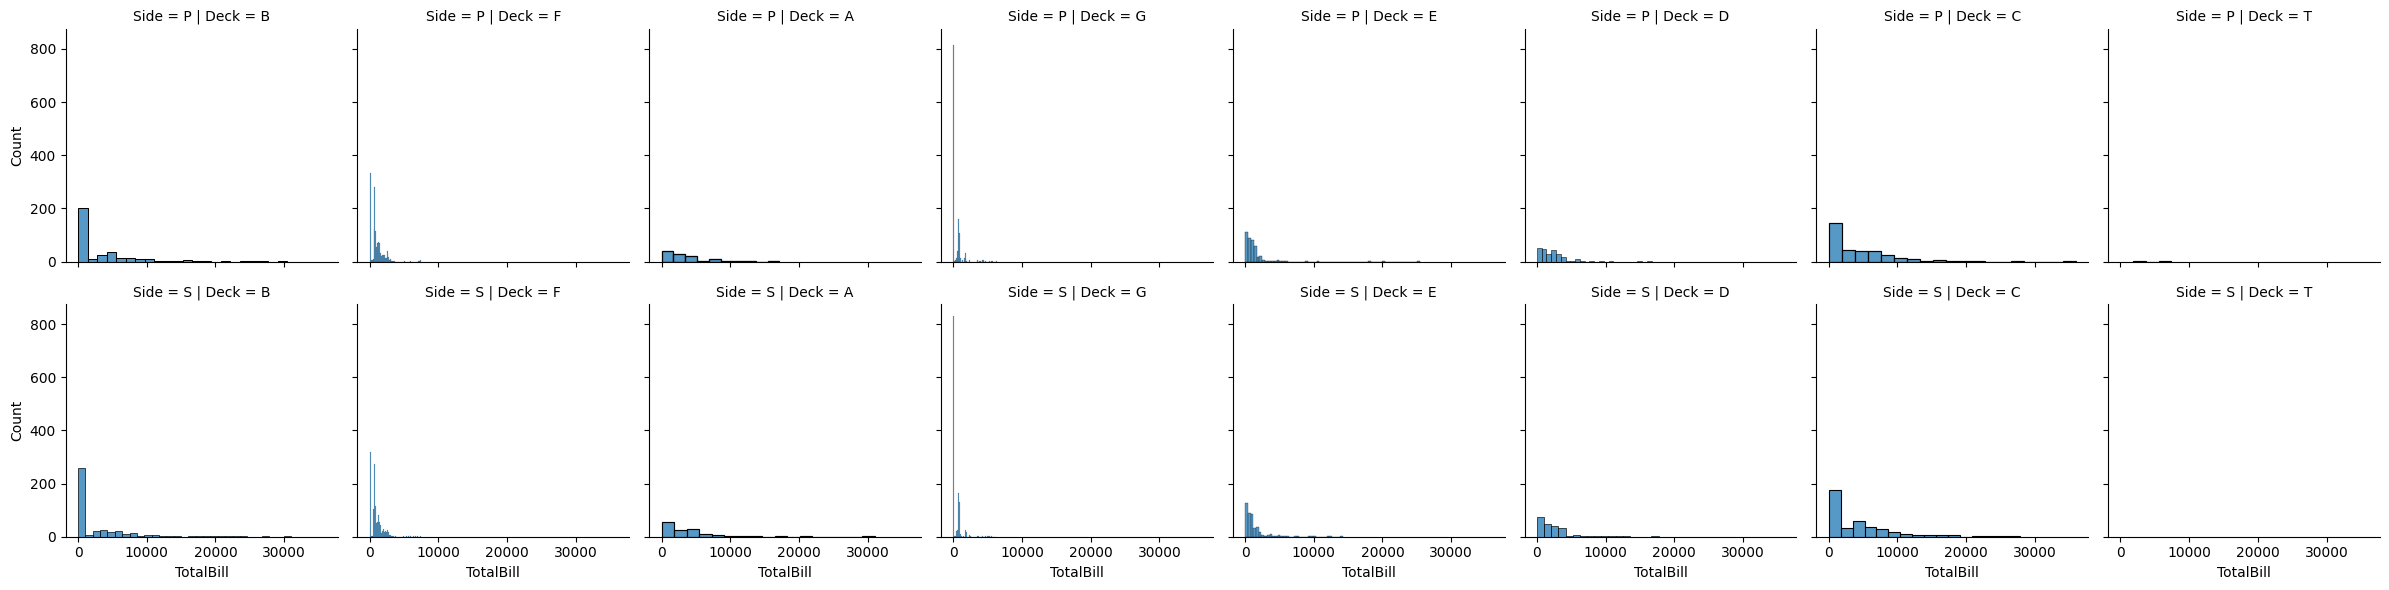

In [63]:
g = sns.FacetGrid(df_in_use, col = 'Deck', row = 'Side')
g.map(sns.histplot,'TotalBill')

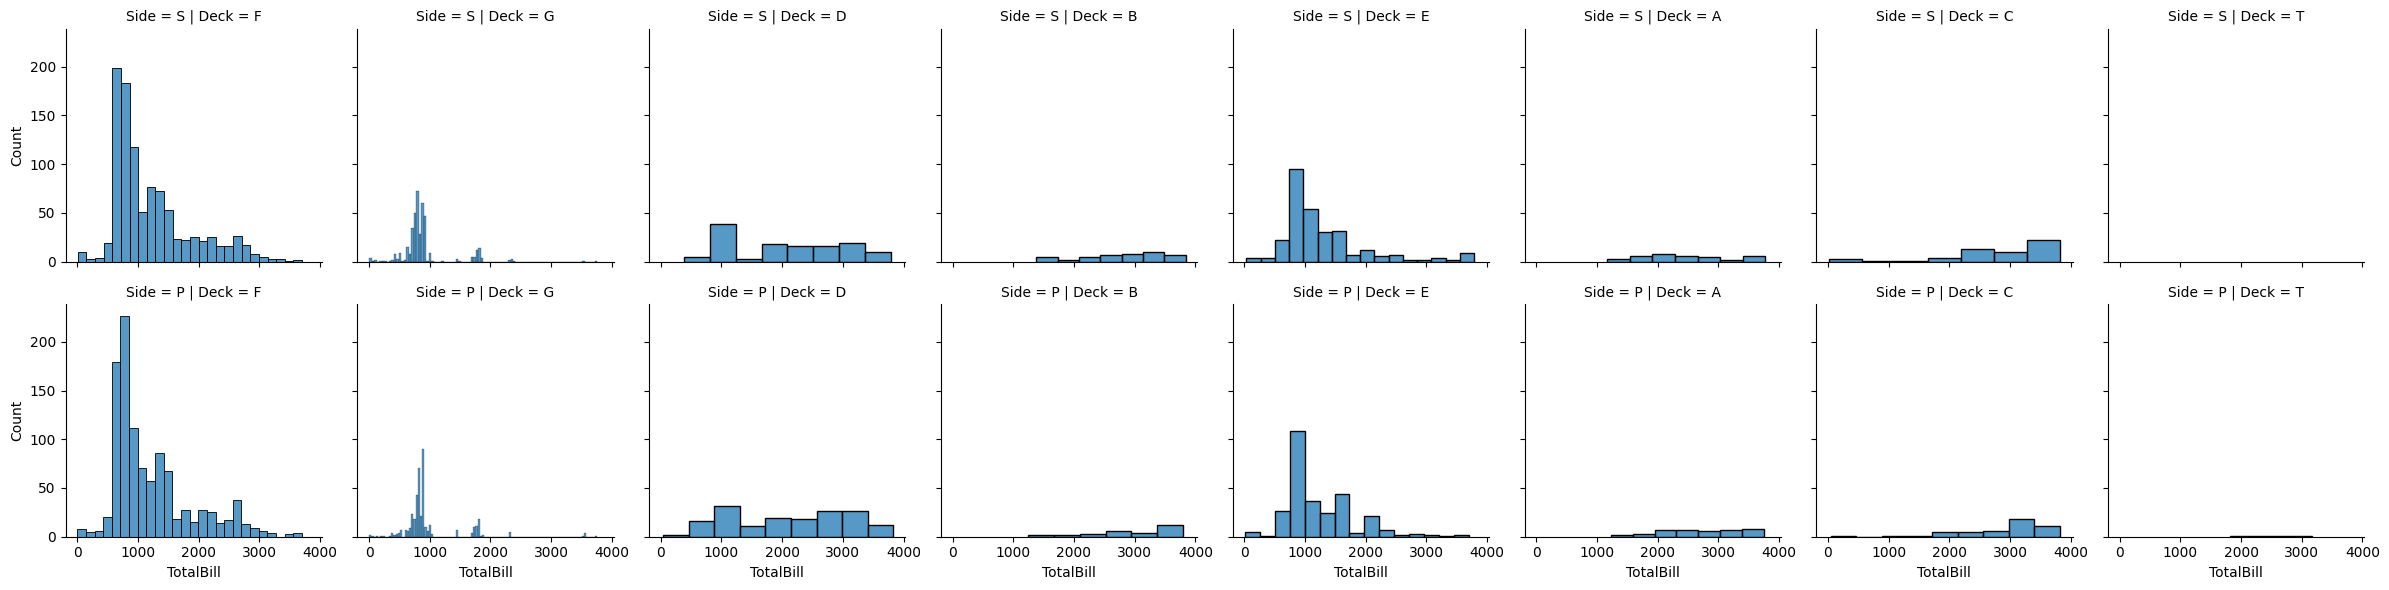

c:\Users\vetle\repo\space-titanic-kaggle\venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


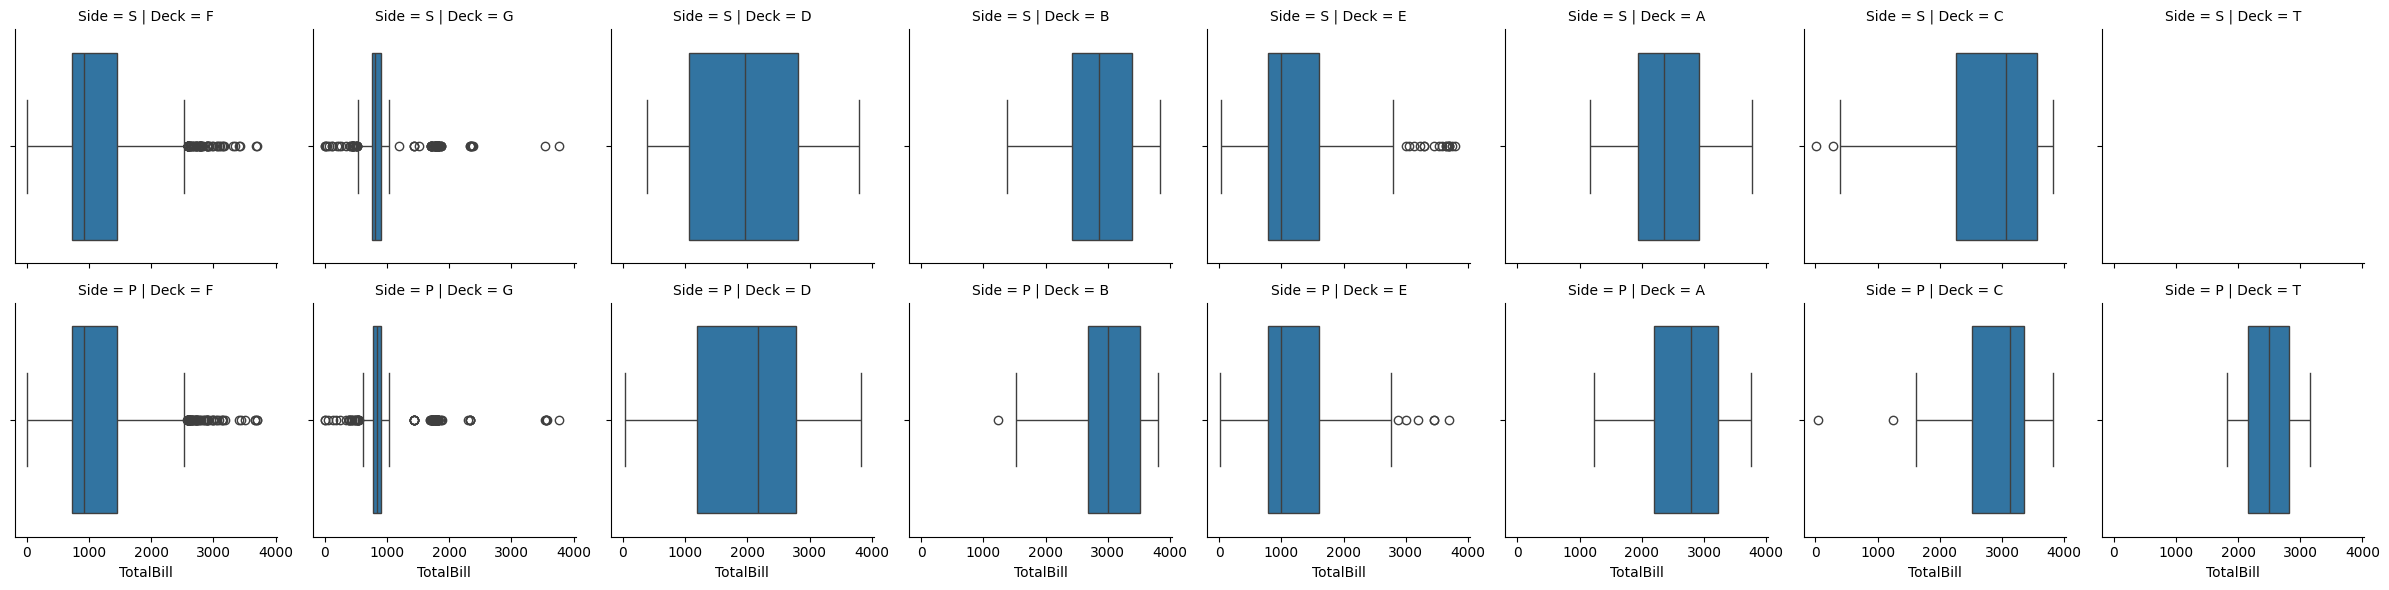

In [64]:
g = sns.FacetGrid(df_in_use.query("TotalBill > TotalBill.quantile(0.1) and TotalBill < TotalBill.quantile(0.9)"), col = 'Deck', row = 'Side')
g.map(sns.histplot,'TotalBill')
plt.show()
g = sns.FacetGrid(df_in_use.query("TotalBill > TotalBill.quantile(0.1) and TotalBill < TotalBill.quantile(0.9)"), col = 'Deck', row = 'Side')
g.map(sns.boxplot,'TotalBill')
plt.show()

In [65]:
px.histogram(data_frame= df_in_use.query("TotalBill > TotalBill.quantile(0.05) and TotalBill < TotalBill.quantile(0.95)"), x = 'TotalBill', facet_row= 'Transported')

In [66]:
px.box(data_frame= df_in_use.query("TotalBill > TotalBill.quantile(0.05) and TotalBill < TotalBill.quantile(0.95)"), y = 'TotalBill', color= 'Transported', facet_col = 'Destination')

In [70]:
df_in_use.describe()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalBill,MoneySpent
count,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000,8476.000000
mean,0.358306,28.812647,220.101699,448.277489,170.313709,305.442544,298.585418,1442.720859,0.419420
std,0.479531,14.330101,658.790747,1599.955616,602.798802,1131.402772,1135.939344,2814.112526,0.493493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,717.000000,0.000000
75%,1.000000,37.000000,41.000000,60.000000,23.000000,54.000000,40.250000,1434.250000,1.000000
max,1.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,1.000000


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_in_use[['Age', 'RoomService', ]])

ValueError: could not convert string to float: 'B/0/P'

In [67]:
df_in_use.query(" TotalBill < TotalBill.quantile(0.95)").dropna()[['VIP']].astype(float).head()

ValueError: could not convert string to float: 'False'

In [ ]:
#df_in_use
X = sm.add_constant(pd.get_dummies(df_in_use.query(" TotalBill < TotalBill.quantile(0.95)").dropna()[['HomePlanet', 'TotalBill', 'Side','VIP']], columns=['HomePlanet', 'Side','VIP'], drop_first=True)).astype(int)
print(f'{X.shape[0]}, {df_in_use.query("TotalBill > TotalBill.quantile(0.1) and TotalBill < TotalBill.quantile(0.9)").dropna().shape[0]}')
model = sm.Logit(df_in_use.query("TotalBill < TotalBill.quantile(0.95)").dropna()['Transported'].astype(int), X).fit()

# Print the model summary to see the coefficient estimates and other statistics
print(model.summary())

7529, 3818
Optimization terminated successfully.
         Current function value: 0.570509
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Transported   No. Observations:                 7529
Model:                          Logit   Df Residuals:                     7522
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.1765
Time:                        17:34:12   Log-Likelihood:                -4295.4
converged:                       True   LL-Null:                       -5216.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0065      0.045     -0.145      0.885      -0.094       0.0

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4524 entries, 1 to 8692
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   const              4524 non-null   int32
 1   TotalBill          4524 non-null   int32
 2   MoneySpent         4524 non-null   int32
 3   HomePlanet_Europa  4524 non-null   int32
 4   HomePlanet_Mars    4524 non-null   int32
 5   Deck_B             4524 non-null   int32
 6   Deck_C             4524 non-null   int32
 7   Deck_D             4524 non-null   int32
 8   Deck_E             4524 non-null   int32
 9   Deck_F             4524 non-null   int32
 10  Deck_G             4524 non-null   int32
 11  Deck_T             4524 non-null   int32
 12  Side_S             4524 non-null   int32
dtypes: int32(13)
memory usage: 265.1 KB


In [ ]:
X.describe()

,const,TotalBill,MoneySpent,HomePlanet_Europa,HomePlanet_Mars,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
count,4524.0,4524.000000,4524.0,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000,4524.000000
mean,1.0,2177.139036,0.0,0.206012,0.214854,0.057029,0.079797,0.075818,0.131300,0.440760,0.180813,0.000663,0.497347
std,0.0,2333.671484,0.0,0.404484,0.410767,0.231924,0.271008,0.264736,0.337765,0.496533,0.384906,0.025746,0.500048
min,1.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,792.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1163.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,2578.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.0,14744.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_in_use.query("TotalBill > TotalBill.quantile(0.05) and TotalBill < TotalBill.quantile(0.95)").corr(numeric_only= True)



,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Num,TotalBill,SpentMoney,MoneySpent
CryoSleep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,0.007857,0.108052,-0.030143,0.090229,0.053293,0.007110,-0.086886,0.139300,NaN,NaN
RoomService,NaN,0.007857,1.000000,-0.165324,-0.040677,-0.161903,-0.151801,-0.174894,-0.015314,0.214979,NaN,NaN
FoodCourt,NaN,0.108052,-0.165324,1.000000,-0.134929,0.042507,0.061177,0.300294,-0.224428,0.578231,NaN,NaN
ShoppingMall,NaN,-0.030143,-0.040677,-0.134929,1.000000,-0.122823,-0.138577,0.224528,0.002338,0.151822,NaN,NaN
Spa,NaN,0.090229,-0.161903,0.042507,-0.122823,1.000000,0.000909,-0.164819,-0.139147,0.439675,NaN,NaN
VRDeck,NaN,0.053293,-0.151801,0.061177,-0.138577,0.000909,1.000000,-0.142575,-0.145421,0.415306,NaN,NaN
Transported,NaN,0.007110,-0.174894,0.300294,0.224528,-0.164819,-0.142575,1.000000,-0.030069,0.038261,NaN,NaN
Num,NaN,-0.086886,-0.015314,-0.224428,0.002338,-0.139147,-0.145421,-0.030069,1.000000,-0.304263,NaN,NaN
TotalBill,NaN,0.139300,0.214979,0.578231,0.151822,0.439675,0.415306,0.038261,-0.304263,1.000000,NaN,NaN


In [ ]:
df_in_use.query("TotalBill > TotalBill.quantile(0.05) and TotalBill < TotalBill.quantile(0.95)")['Transported'].astype(int)

1       1
3       0
4       1
5       1
6       1
       ..
8683    0
8686    0
8690    1
8691    0
8692    1
Name: Transported, Length: 4497, dtype: int32

In [ ]:
df_in_use.query("TotalBill > TotalBill.quantile(0.05) and TotalBill < TotalBill.quantile(0.95)")['Transported'].astype(int)

1       1
3       0
4       1
5       1
6       1
       ..
8683    0
8686    0
8690    1
8691    0
8692    1
Name: Transported, Length: 4497, dtype: int32

# Trying a neural net



In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
# Assuming df is your DataFrame and the preprocessing steps are defined as above
df2 = create_money_spent_feature(df)

# Now, prepare your data for the neural network
# Assuming 'Transported' is the label
y = df2['Transported']
X = df2.drop('Transported', axis=1)  # The original DataFrame without the label

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        # ('cabin_split', FunctionTransformer(cabin_split)),
        ('cat', OneHotEncoder(), ['HomePlanet', 'Deck', 'Side', 'VIP']),
        ('num', scaler, ['MoneySpent'])
    ],
    remainder='drop'  # Keep other columns including 'MoneySpent'
)



# Define a neural network model in Keras
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Adjust input shape based on preprocessed data
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Preprocess the data
# First, fit_transform your training data with only the preprocessor part
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Fit the model
model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32)

# Evaluate the model
model.evaluate(X_test_preprocessed, y_test)


ValueError: not enough values to unpack (expected 3, got 2)

In [84]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,MoneySpent
2333,2513_01,Earth,False,NaN,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison,711.0
2589,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,1226.0
8302,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,0.0
8177,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,NaN,2.0,289.0,976.0,0.0,Tros Pota,1267.0
500,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,0.0


In [85]:
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


# 